## Predictive Analytics

# Importing and Cleaning data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import calendar
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
House_price = pd.read_csv('train.csv')
House_price.shape

(1460, 81)

In [3]:
House_price.drop('Id' , axis = 1 , inplace = True)
House_price.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
House_price.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
House_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

#### Missing values

In [6]:
pd.set_option('display.max_rows', None)
missing_values = House_price.isnull().sum()
print(missing_values)

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

#### Result: In this dataset there are 1460 rows, based on the result of missing values, some columns have a lot of missing values, so I will drop these columns. For other columns which have a few missing values I will use fill na methods to fill these missing values with mean and mode. mean for numeric columns and mode for nun-numeric columns.

In [7]:
threshold = 0.75  # Set your threshold for missing values, e.g., 50%

# Calculate the threshold count
missing_threshold = len(House_price) * threshold

# Drop columns with missing values surpassing the threshold
House_price = House_price.dropna(axis=1, thresh=missing_threshold)

# Replace missing values in specific columns with their mean
columns_to_fill_mean = ['LotFrontage', 'GarageYrBlt', 'GarageCars', 'GarageArea']
columns_to_fill_mode = ['BsmtQual', 'MasVnrArea', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

# Fill missing values with mean
House_price.loc[:, columns_to_fill_mean] = House_price.loc[:, columns_to_fill_mean].fillna(House_price.loc[:, columns_to_fill_mean].mean())

# Fill missing values with mode
mode_values = House_price.loc[:, columns_to_fill_mode].mode().iloc[0]
House_price.loc[:, columns_to_fill_mode] = House_price.loc[:, columns_to_fill_mode].fillna(mode_values)


In [8]:
missing_values = House_price.isnull().sum().sum()
print (f'Total missing value in all dataframe is {missing_values}')

Total missing value in all dataframe is 0


### Outliers

In [9]:
numeric_columns = House_price.select_dtypes(include=np.number).columns.tolist()
print("Numeric columns:", numeric_columns)


Numeric columns: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [10]:
'''
print("Original shape:", House_price.shape)
# Using Z-score to identify potential outliers
from scipy import stats

z_scores = np.abs(stats.zscore(House_price[numeric_columns]))
threshold = 3  # Define your threshold for Z-score
outliers = np.where(z_scores > threshold)

# Remove rows with outliers from the DataFrame
House_price = House_price[(z_scores <= threshold).all(axis=1)]

# Compare the shapes to see how many rows were removed
print("Shape after removing outliers:", House_price.shape)
'''

'\nprint("Original shape:", House_price.shape)\n# Using Z-score to identify potential outliers\nfrom scipy import stats\n\nz_scores = np.abs(stats.zscore(House_price[numeric_columns]))\nthreshold = 3  # Define your threshold for Z-score\noutliers = np.where(z_scores > threshold)\n\n# Remove rows with outliers from the DataFrame\nHouse_price = House_price[(z_scores <= threshold).all(axis=1)]\n\n# Compare the shapes to see how many rows were removed\nprint("Shape after removing outliers:", House_price.shape)\n'

In [11]:
cat_columns = House_price.select_dtypes(exclude='number').columns.tolist()
print("Categorical columns:", cat_columns)

Categorical columns: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


# Correlation of columns

In [12]:
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
for col in cat_columns:
    if col != 'SalePrice':  # Exclude the target variable
        if House_price[col].dtype == 'object':
            House_price[col] = label_encoder.fit_transform(House_price[col].astype(str))

# Compute correlation matrix
correlation_matrix = House_price.corr()

# Set a threshold for correlation
threshold = 0.5 

# keeping the high correlated categorical columns
high_corr_columns = correlation_matrix['SalePrice'][correlation_matrix['SalePrice'].abs() > threshold]
high_corr_columns = high_corr_columns.drop('SalePrice')  # Exclude SalePrice correlation with itself
high_corr_columns = high_corr_columns.sort_values(ascending=False)

high_corr_columns

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageFinish   -0.537242
KitchenQual    -0.589189
BsmtQual       -0.618025
ExterQual      -0.636884
Name: SalePrice, dtype: float64

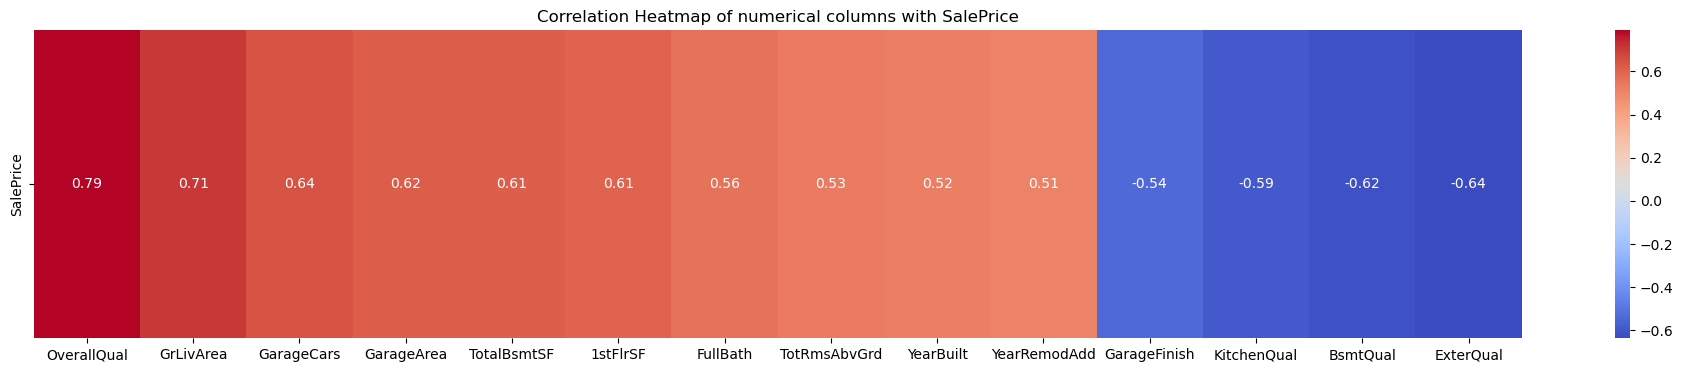

In [13]:
# Calculate Correlation

plt.figure(figsize=(24, 4))  # Set the size of the heatmap
sns.heatmap(correlation_matrix.loc[['SalePrice'], high_corr_columns.index], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of numerical columns with SalePrice')
plt.show()


In [14]:
high_corr_columns = high_corr_columns.index.tolist()
high_corr_columns

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'GarageFinish',
 'KitchenQual',
 'BsmtQual',
 'ExterQual']

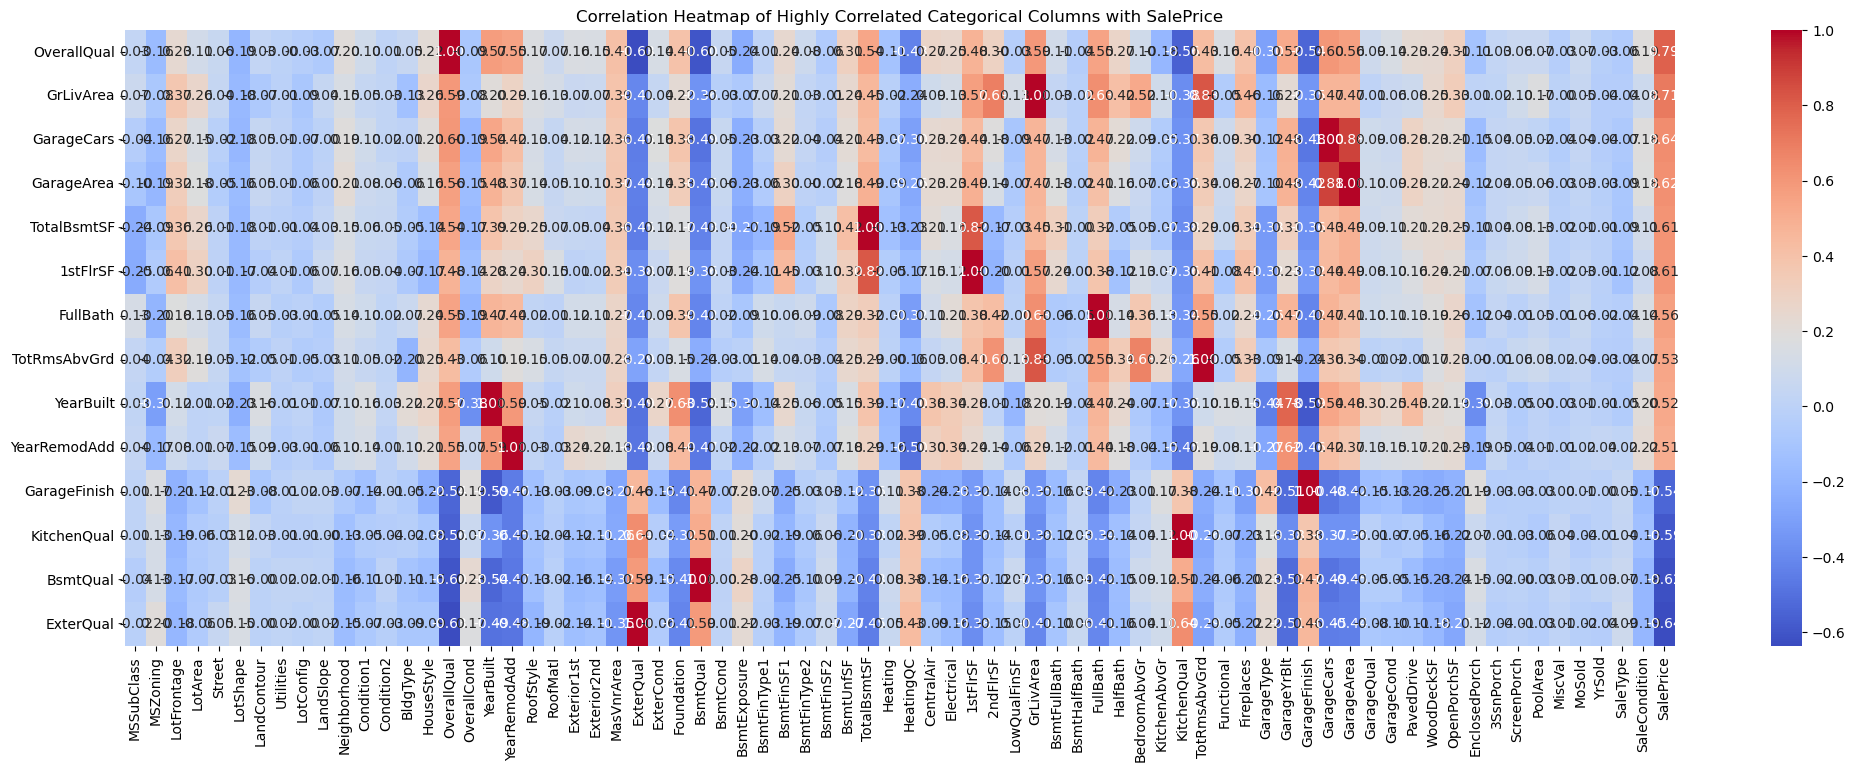

In [15]:
# Plot heatmap for highly correlated columns
plt.figure(figsize=(25, 8))
sns.heatmap(correlation_matrix.loc[high_corr_columns], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Highly Correlated Categorical Columns with SalePrice')
plt.show()

# Plots

## Frequency Distribution for SalePrice

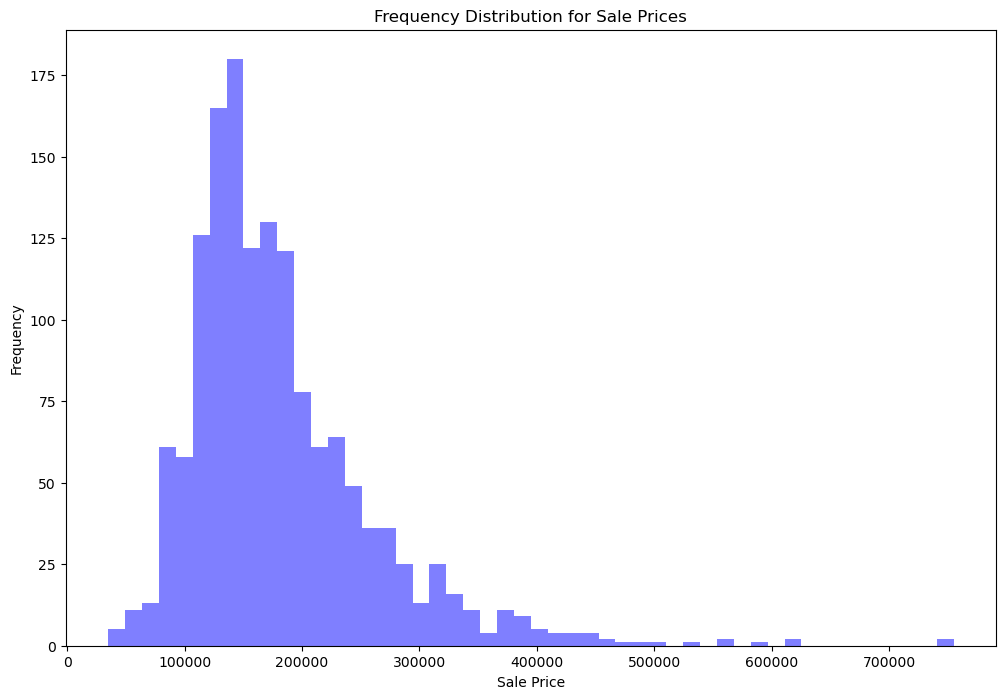

In [16]:
plt.figure(figsize=(12, 8))
plt.hist(House_price['SalePrice'], bins=50, color='blue', alpha=0.5)
plt.title('Frequency Distribution for Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()


## Histogram for high correlated columns

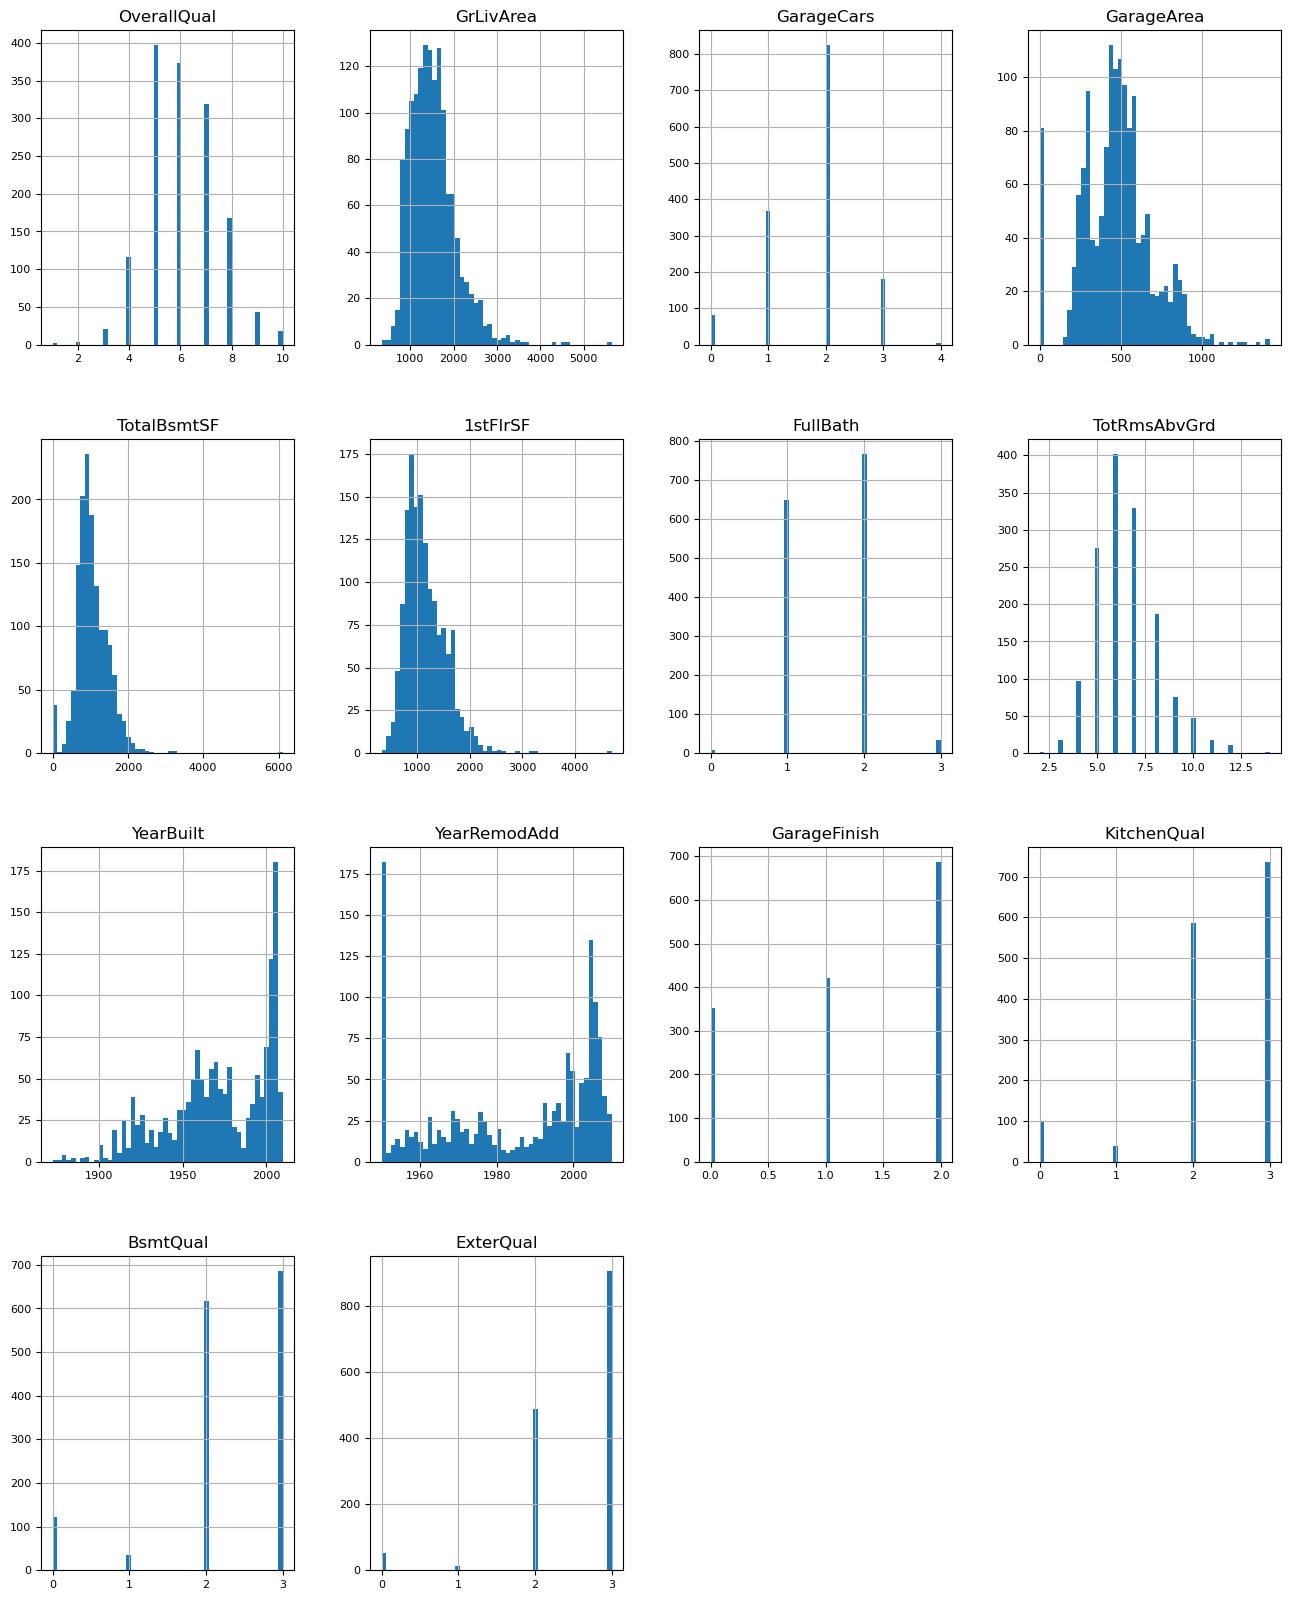

In [17]:
# Create histograms for numerical columns
House_price[high_corr_columns].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
# Display the histograms
plt.show()

## ScatterPlots for high correlated columns

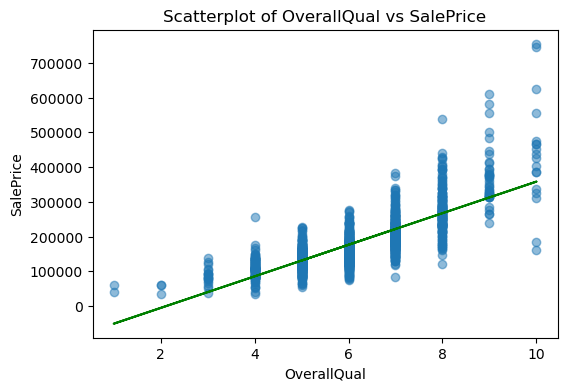

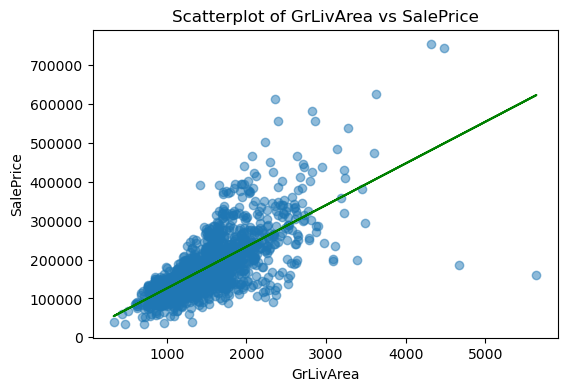

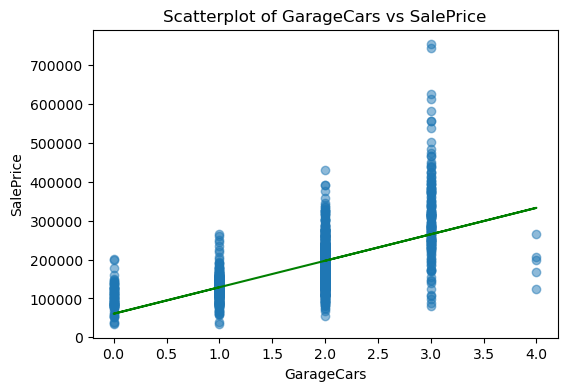

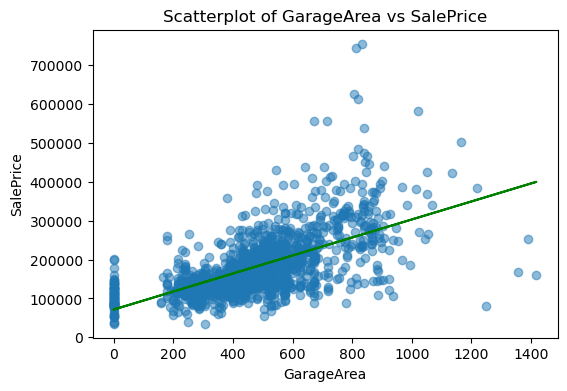

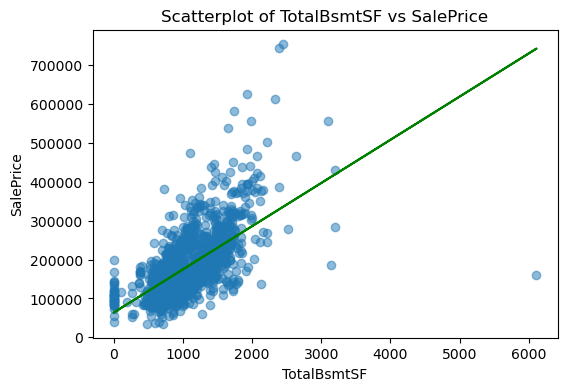

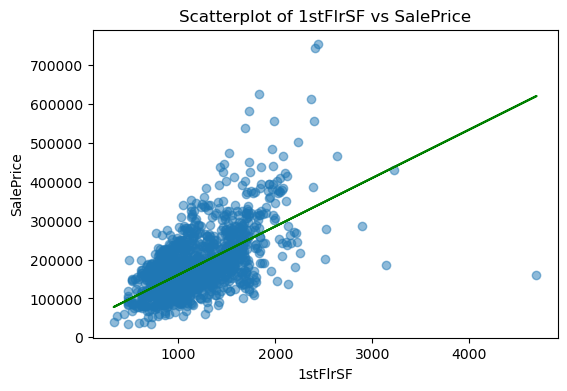

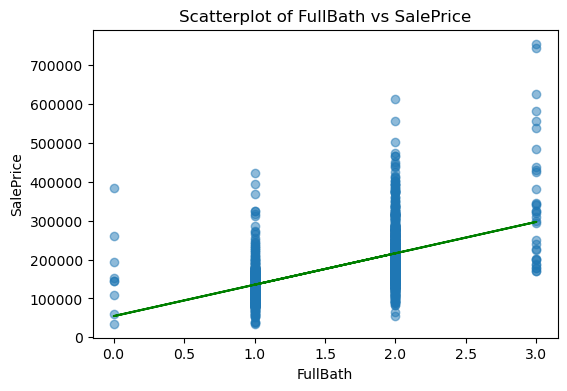

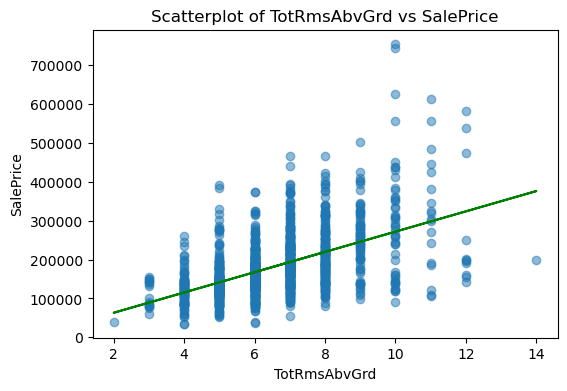

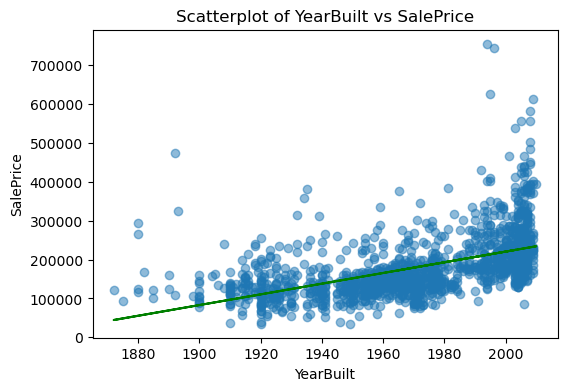

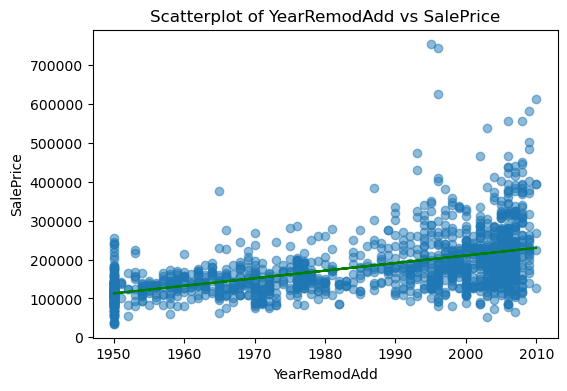

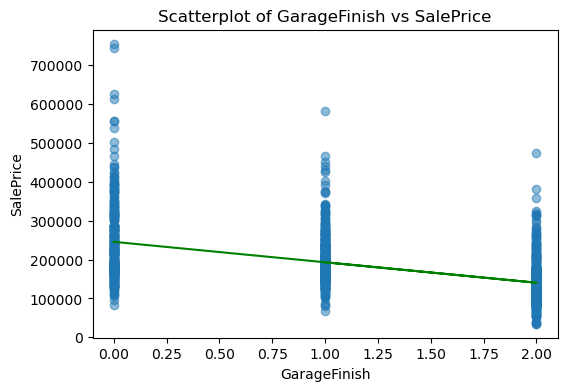

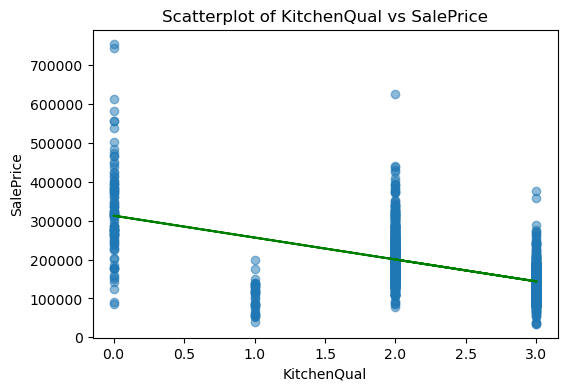

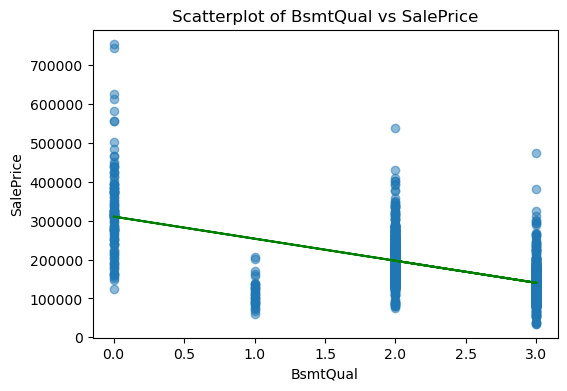

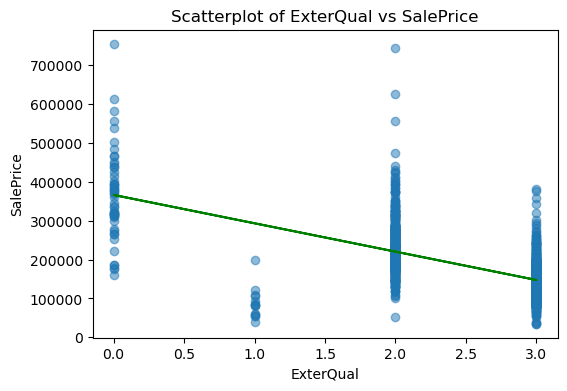

In [18]:
# Plot scatterplots for each highly correlated column with SalePrice
for column in high_corr_columns:
    plt.figure(figsize=(6, 4))
    plt.scatter(House_price[column], House_price['SalePrice'], alpha=0.5)
    plt.title(f'Scatterplot of {column} vs SalePrice')
    plt.xlabel(column)
    plt.ylabel('SalePrice')
    
    # Add a line of best fit
    m, b = np.polyfit(House_price[column], House_price['SalePrice'], 1)
    plt.plot(House_price[column], m * House_price[column] + b, color='green')

    plt.show()

### For result and interpretation of these scatterplots please look at Report file.

## Year of sold and house price visualization 

In [19]:
# Change month number to its name
House_price['MoSold'] = House_price['MoSold'].apply(lambda x: calendar.month_abbr[x]) 
# Finding and printing the sale price with its corresponding year and month
highest_house_price = House_price.loc[House_price['SalePrice'].idxmax()]
highest_price = highest_house_price['SalePrice']
highest_year = highest_house_price['YrSold']
highest_month = highest_house_price['MoSold']


print(f"\n\n\nHighest House price was: {highest_price}$ in {highest_month} {highest_year}\n\n\n")





Highest House price was: 755000$ in Jan 2007





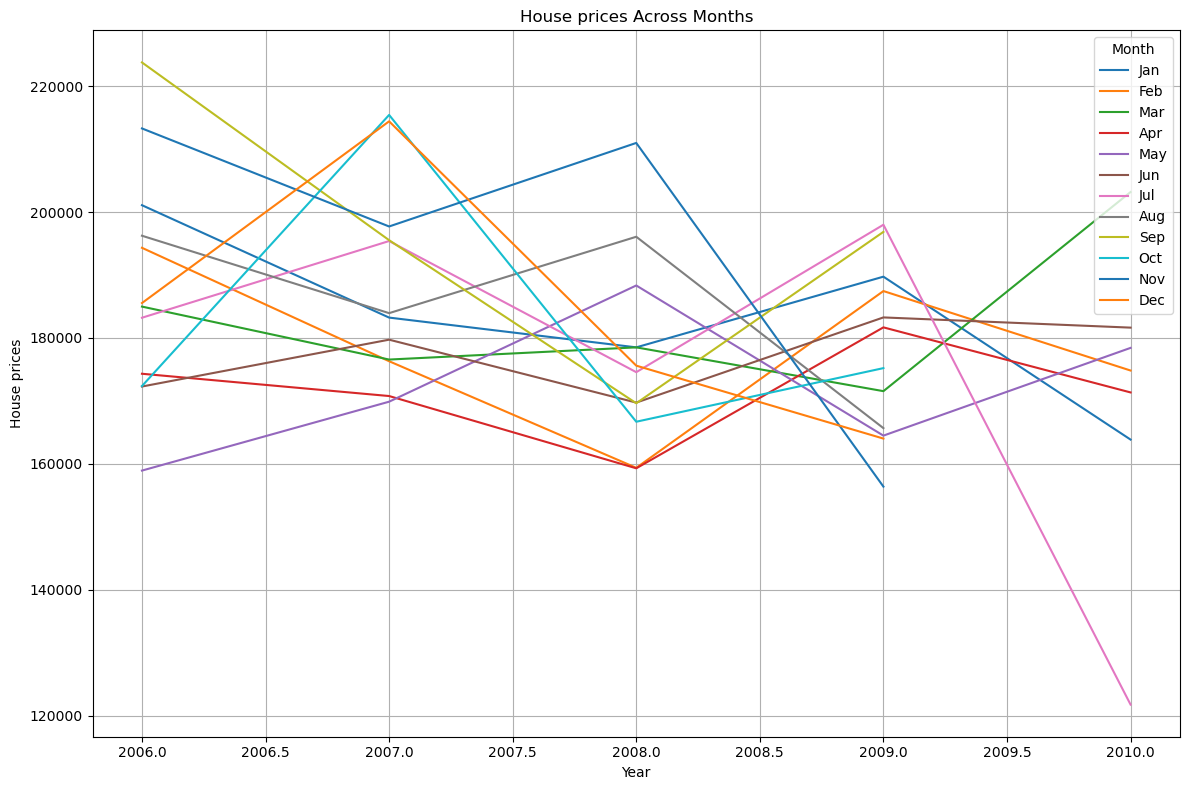

In [20]:
plt.figure(figsize=(12, 8))  # Adjusted figure size for better visualization
months_order = calendar.month_abbr[1:]  # List of abbreviated month names in order

# Using a for loop
for month in months_order: 
    month_data = House_price[House_price['MoSold'] == month]
    sns.lineplot(x='YrSold', y='SalePrice', data=month_data, label=month, ci=None)  # Removing shade from lines

# Formatting the plot
plt.title('House prices Across Months')
plt.xlabel('Year')
plt.ylabel('House prices')
plt.legend(title='Month')
plt.grid(True)

plt.tight_layout()
# Show plot
plt.show()

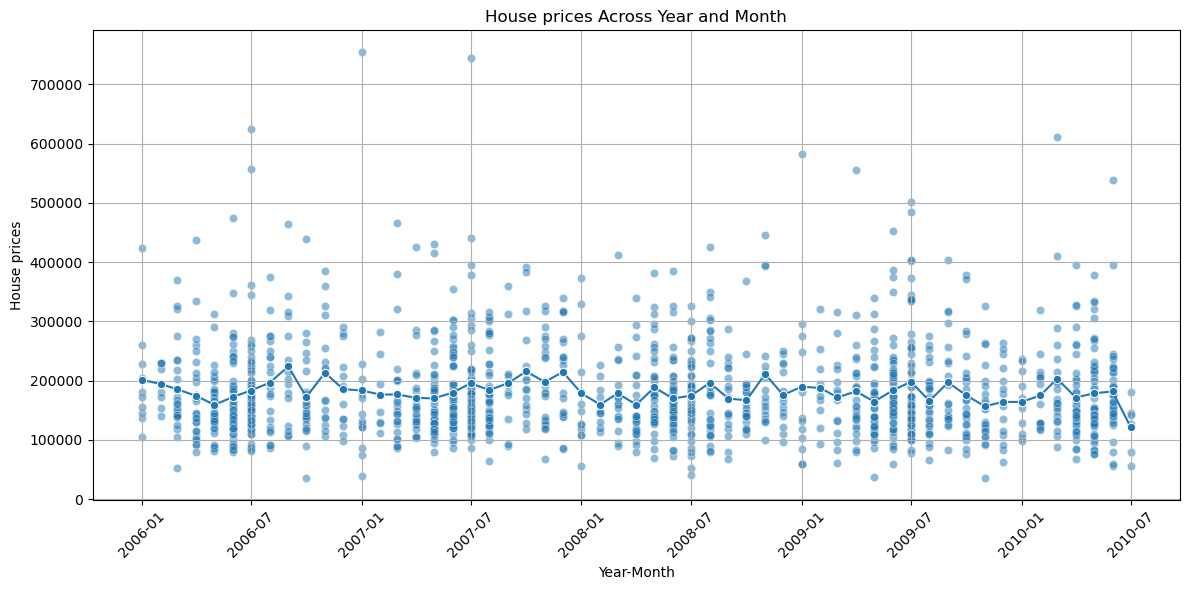

In [21]:
# Combine 'YrSold' and 'MoSold' to create a new column 'YearMonth'
House_price['YearMonth'] = House_price['YrSold'].astype(str) + '-' + House_price['MoSold']
# Convert 'YearMonth' to datetime format for proper sorting
House_price['YearMonth'] = pd.to_datetime(House_price['YearMonth'], format='%Y-%b')

# Sort the DataFrame by 'YearMonth'
House_price = House_price.sort_values('YearMonth')
# Calculating average sale prices per month
monthly_avg_prices = House_price.groupby('YearMonth')['SalePrice'].mean().reset_index()

plt.figure(figsize=(12, 6)) 
# Plotting average sale prices against months
sns.lineplot(x='YearMonth', y='SalePrice', data=monthly_avg_prices, marker='o')
# Plotting sale prices against the newly created sorted 'YearMonth' column
sns.scatterplot(x='YearMonth', y='SalePrice', data=House_price, alpha=0.5)

# Formatting the plot
plt.title('House prices Across Year and Month')
plt.xlabel('Year-Month')
plt.ylabel('House prices')
plt.xticks(rotation=45) 
plt.grid(True)

plt.tight_layout()

plt.show()


## Calculate the skew of a dataset

    Skewness in data refers to how asymmetrically distributed the values are around the average. When data is skewed, it can affect the performance of predictive models for a few reasons:

    1. Assumption of Normality: Many machine learning algorithms assume that the data is normally distributed. Skewed data violates this assumption, potentially impacting the accuracy of these models.

    2. Influence on Model Performance: Skewed data can cause issues like bias in predictions, especially in linear models, where predictions might be pulled towards the skewed direction.

    3. Impact on Relationships: Skewed data might distort relationships between variables, affecting how models interpret the importance of different features.

    By transforming skewed data, we're aiming to make the distribution of values more symmetrical, closer to a normal (bell-shaped) curve. This can help models make better predictions, improve model stability, and enhance the overall reliability of insights derived from the data.

In [22]:
# finding skewness before transforming
skewness = House_price[high_corr_columns].apply(lambda x: x.skew()).sort_values(ascending=False)
print(skewness)

TotalBsmtSF     1.524255
1stFlrSF        1.376757
GrLivArea       1.366560
TotRmsAbvGrd    0.676341
OverallQual     0.216944
GarageArea      0.179981
FullBath        0.036562
GarageCars     -0.342549
GarageFinish   -0.440519
YearRemodAdd   -0.503562
YearBuilt      -0.613461
BsmtQual       -1.344288
KitchenQual    -1.422808
ExterQual      -1.830265
dtype: float64


In [23]:
# name of skewned columns (threshold set to 1.0)
skewed_features = skewness[abs(skewness) > 1.0].index

skewed_features

Index(['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'BsmtQual', 'KitchenQual',
       'ExterQual'],
      dtype='object')

In [24]:
from scipy.stats import boxcox

# using BoxCox for transforming the highly negative skewnesses
highly_negative_skew_features = ['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'BsmtQual', 'KitchenQual','ExterQual']

for feature in highly_negative_skew_features:
    House_price[feature], _ = boxcox(House_price[feature] - House_price[feature].min() + 1)


In [25]:
# finding the skewness after transforming
skewness = House_price[high_corr_columns].apply(lambda x: x.skew()).sort_values(ascending=False)
print(skewness)


TotRmsAbvGrd    0.676341
TotalBsmtSF     0.232534
OverallQual     0.216944
GarageArea      0.179981
GrLivArea       0.090075
1stFlrSF        0.075154
FullBath        0.036562
GarageCars     -0.342549
BsmtQual       -0.422614
GarageFinish   -0.440519
KitchenQual    -0.448082
YearRemodAdd   -0.503562
YearBuilt      -0.613461
ExterQual      -0.622031
dtype: float64


# Histograms after transforming the skewness

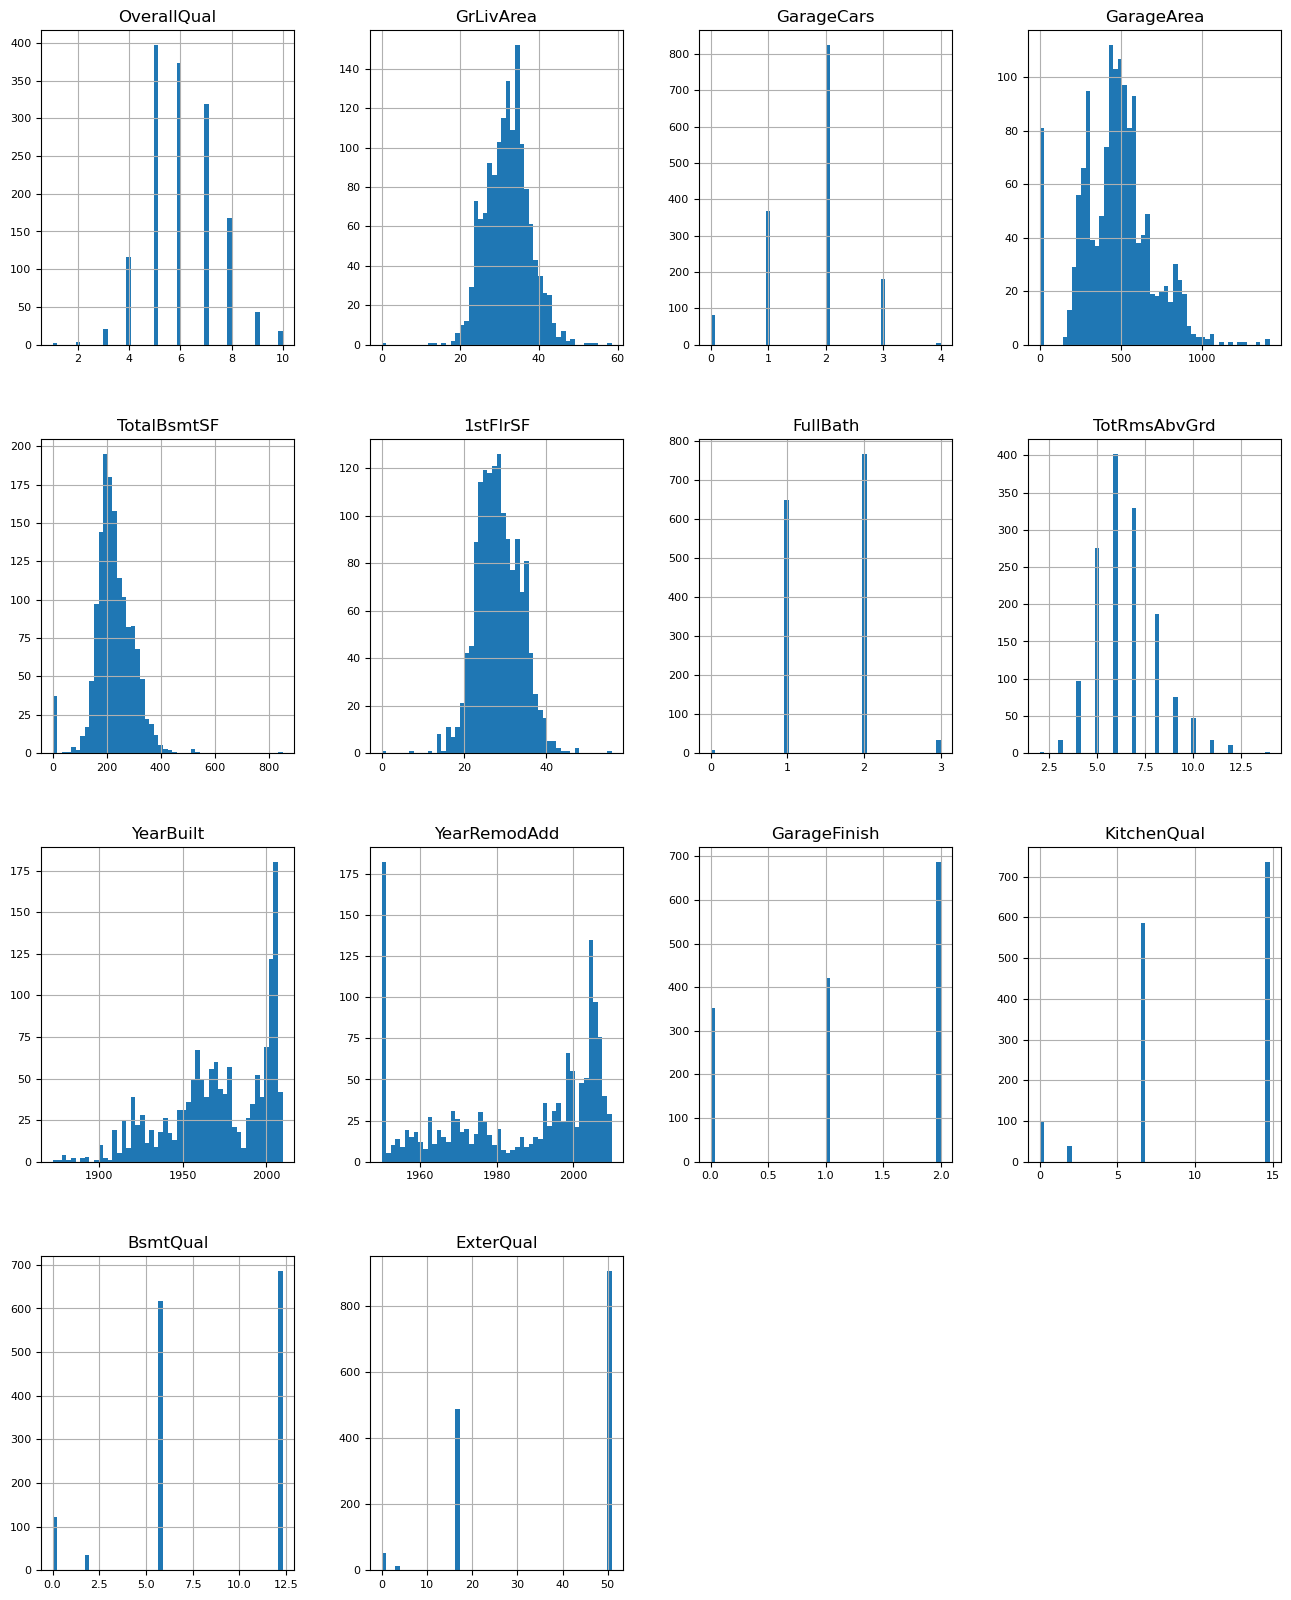

In [26]:
# Create histograms for numerical columns
House_price[high_corr_columns].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
# Display the histograms
plt.show()


### Standardization and normalization

In [27]:
"""from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Normalization
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)
"""

'from sklearn.preprocessing import StandardScaler, MinMaxScaler\n\n# Standardization\nscaler = StandardScaler()\nX_train_scaled = scaler.fit_transform(X_train)\nX_test_scaled = scaler.transform(X_test)\n\n# Normalization\nscaler = MinMaxScaler()\nX_train_normalized = scaler.fit_transform(X_train)\nX_test_normalized = scaler.transform(X_test)\n'

# Train Test Split

In [28]:
# Define features and target variable
features = high_corr_columns
target = 'SalePrice'

X = House_price[features]
y = House_price[target]

## Linear Regression 

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("RMSE:", rmse)
print("R-squared:", r2)
print("Mean Absolute Error (MAE):", mae)
# Cross-validation for the linear regression model
cv_scores_lin = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-Validation R-squared scores for Linear Regression:", cv_scores_lin)
print("Mean CV R-squared for Linear Regression:", np.mean(cv_scores_lin))

RMSE: 41692.92654459539
R-squared: 0.7684659958976386
Mean Absolute Error (MAE): 26159.915918122773
Cross-Validation R-squared scores for Linear Regression: [0.78898897 0.74846815 0.66930203 0.80022368 0.80584685]
Mean CV R-squared for Linear Regression: 0.7625659349933667


## Quadratic Regression With Evaluation

In [30]:
# Creating quadratic features
poly = PolynomialFeatures(degree=2)
X_quad = poly.fit_transform(X)

# Splitting the quadratic features
X_quad_train, X_quad_test, y_train, y_test = train_test_split(X_quad, y, test_size=0.3, random_state=42)

# Initializing and fitting the quadratic model
quad_model = LinearRegression()
quad_model.fit(X_quad_train, y_train)

# Predicting on the test data
y_quad_pred = quad_model.predict(X_quad_test)

# Evaluating the quadratic model
quad_rmse = mean_squared_error(y_test, y_quad_pred, squared=False)
quad_r2 = r2_score(y_test, y_quad_pred)
quad_mae = mean_absolute_error(y_test, y_quad_pred)

print("Quadratic Regression RMSE:", quad_rmse)
print("Quadratic Regression R-squared:", quad_r2)
print("Mean Absolute Error (MAE):", quad_mae)
# Cross-validation for the quadratic model
cv_scores_quad = cross_val_score(quad_model, X_quad, y, cv=5, scoring='r2')
print("Cross-Validation R-squared scores for Quadratic Regression:", cv_scores_quad)
print("Mean CV R-squared for Quadratic Regression:", np.mean(cv_scores_quad))

Quadratic Regression RMSE: 39647.00842618908
Quadratic Regression R-squared: 0.7906317285414828
Mean Absolute Error (MAE): 22388.630770085336
Cross-Validation R-squared scores for Quadratic Regression: [0.8858118  0.83102948 0.26896191 0.86610344 0.85533034]
Mean CV R-squared for Quadratic Regression: 0.7414473956206574


## Polynomial Regression With Evaluation

In [32]:
# Function to perform polynomial regression and evaluation for a given degree
def perform_polynomial_regression(degree):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Splitting the data
    X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

    poly_model = LinearRegression()
    poly_model.fit(X_poly_train, y_train)

    y_poly_pred = poly_model.predict(X_poly_test)

    poly_rmse = mean_squared_error(y_test, y_poly_pred, squared=False)
    poly_r2 = r2_score(y_test, y_poly_pred)
    poly_mae = mean_absolute_error(y_test, y_poly_pred)


    print(f"Polynomial Regression (Degree {degree}) RMSE:", poly_rmse)
    print(f"Polynomial Regression (Degree {degree}) R-squared:", poly_r2)
    print("Mean Absolute Error (MAE):", poly_mae)

    # Cross-validation
    cv_scores = cross_val_score(poly_model, X_poly, y, cv=5, scoring='r2')
    print("Cross-Validation R-squared scores:", cv_scores)
    print("Mean CV R-squared:", np.mean(cv_scores))
    print("===================")

# Trying different degrees for polynomial regression
degrees_to_try = [3, 4]  # You can adjust this list for more degrees if needed

for degree in degrees_to_try:
    print(f"Degree {degree}:")
    perform_polynomial_regression(degree)



Degree 3:
Polynomial Regression (Degree 3) RMSE: 184240.81028638055
Polynomial Regression (Degree 3) R-squared: -3.5212829964776162
Mean Absolute Error (MAE): 78871.66274228379
Cross-Validation R-squared scores: [ -0.50408456  -0.1560592  -22.56844449  -2.67156262  -2.167983  ]
Mean CV R-squared: -5.6136267720015365
Degree 4:
Polynomial Regression (Degree 4) RMSE: 45720013.51046691
Polynomial Regression (Degree 4) R-squared: -278420.469570257
Mean Absolute Error (MAE): 14000501.972222088
Cross-Validation R-squared scores: [  -361028.02647222    -90685.41431732 -21162250.65841395
   -365718.54571701   -484140.81554418]
Mean CV R-squared: -4492764.692092934


## Decision Tree With Evaluation
## Random Forest With Evaluation
## Support Vector Machine With Evaluation

In [31]:
# Initialize more models
models = {'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR()}

# Evaluate models using cross-validation
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Model: {name}")
    print("RMSE:", rmse)
    print("R-squared:", r2)
    print("Mean Absolute Error (MAE):", mae)
    # Cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print("Cross-Validation R-squared scores:", cv_scores)
    print("Mean CV R-squared:", np.mean(cv_scores))
    print("===================")


Model: Decision Tree
RMSE: 44518.36712929224
R-squared: 0.736021549921468
Mean Absolute Error (MAE): 29532.12785388128
Cross-Validation R-squared scores: [0.7269361  0.7841738  0.21105872 0.74018554 0.78225395]
Mean CV R-squared: 0.6489216198157649
Model: Random Forest
RMSE: 36687.93537367499
R-squared: 0.8207180504903031
Mean Absolute Error (MAE): 21545.74094835834
Cross-Validation R-squared scores: [0.87754752 0.83484796 0.49804768 0.86068696 0.86698406]
Mean CV R-squared: 0.7876228350905196
Model: Support Vector Machine
RMSE: 89335.1568633324
R-squared: -0.06300383165342249
Mean Absolute Error (MAE): 61009.28546317707
Cross-Validation R-squared scores: [-0.05504208 -0.04669701 -0.10292573 -0.05826521 -0.01837613]
Mean CV R-squared: -0.05626123519011781
